In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df = df.select_dtypes(include=['int', 'float'])

In [6]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   bgr     356 non-null    float64
 7   bu      381 non-null    float64
 8   sc      383 non-null    float64
 9   sod     313 non-null    float64
 10  pot     312 non-null    float64
 11  hemo    348 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 37.6 KB


In [13]:
from sklearn.impute import KNNImputer

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('id')

# Selecting only the numerical columns, excluding 'id' for imputation
kidney_data_numerical_for_imputation = df[numerical_cols.to_list()].drop(columns=['id'], errors='ignore')

# Setting up the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Applying KNN Imputation
kidney_data_imputed = knn_imputer.fit_transform(kidney_data_numerical_for_imputation)

# Creating a DataFrame from the imputed data
kidney_data_imputed_df = pd.DataFrame(kidney_data_imputed, columns=kidney_data_numerical_for_imputation.columns)

# Verifying the imputation results
kidney_data_imputed_df.info(), kidney_data_imputed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   bgr     400 non-null    float64
 6   bu      400 non-null    float64
 7   sc      400 non-null    float64
 8   sod     400 non-null    float64
 9   pot     400 non-null    float64
 10  hemo    400 non-null    float64
dtypes: float64(11)
memory usage: 34.5 KB


(None,
     age    bp     sg   al   su    bgr    bu   sc    sod   pot  hemo
 0  48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2  140.0  4.22  15.4
 1   7.0  50.0  1.020  4.0  0.0  110.4  18.0  0.8  137.8  4.02  11.3
 2  62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8  136.2  4.32   9.6
 3  48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.50  11.2
 4  51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4  138.4  4.26  11.6)

In [14]:
kidney_data_imputed_df.to_csv('kidney_disease_v1.csv', index=False)

In [17]:
kidney_data_imputed_df.round(2).to_csv('kidney_disease_v2.csv', index=False)

In [5]:
df = pd.read_csv('kidney_disease_dataset.csv')
    
# Preprocess dataset (assuming preprocessing is done here)

# Perform PCA
scaler = StandardScaler()
pca = PCA()
standardized_data = scaler.fit_transform(df)
pca.fit(standardized_data)
transformed_data = pca.transform(standardized_data)

# Prepare data to be sent to frontend
data = {
    'eigenvalues': pca.explained_variance_.tolist(),
    'loadings': pca.components_.tolist(),
    'transformed': transformed_data[:, :2].tolist(),  # For biplot, using first 2 PCs
}

In [13]:
len(data['loadings'][0])

11

In [21]:
data['transformed']

[[-1.2898319993116163, 0.05753675306610488],
 [-0.9262702581006208, 0.7914309871437483],
 [2.904780801997937, -3.2126431339299075],
 [2.3496529864609434, 0.8541664332771788],
 [0.13576681418858658, -0.1478827564050596],
 [0.27282639465196085, -0.41764994436298863],
 [1.9932117532641556, 3.158321786847829],
 [1.820515406273569, -3.3729178767320693],
 [1.2621062039119995, -0.3336226398339914],
 [1.5018838521962132, 2.269395251495584],
 [3.0798428696039766, -3.638811969873508],
 [2.133495741574018, -1.2763949571369129],
 [1.8539055827531046, -0.8658131403510017],
 [0.2670345155519429, 0.8340934986094692],
 [3.203293703557597, -0.37588415156619787],
 [2.1829216035302803, 1.7635394697428803],
 [-0.04530885917581036, 0.22075411373433643],
 [0.6694244558595736, 0.35641439035992056],
 [0.7484394550069275, -2.2429714414296407],
 [-0.2866883879102052, -0.07584160842810442],
 [2.2713518632811303, 0.644927431511965],
 [9.75491996496331, 11.114936325008161],
 [1.6695126707578887, 1.7851419090183973

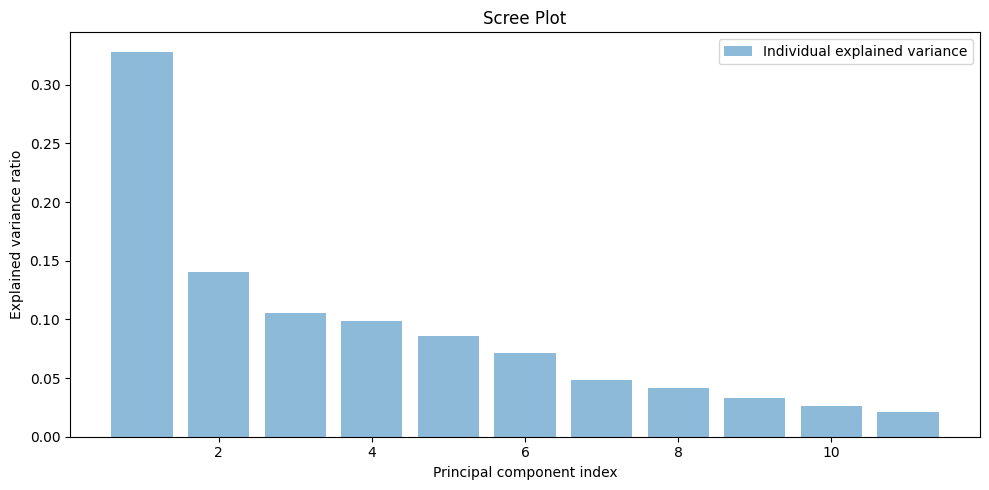

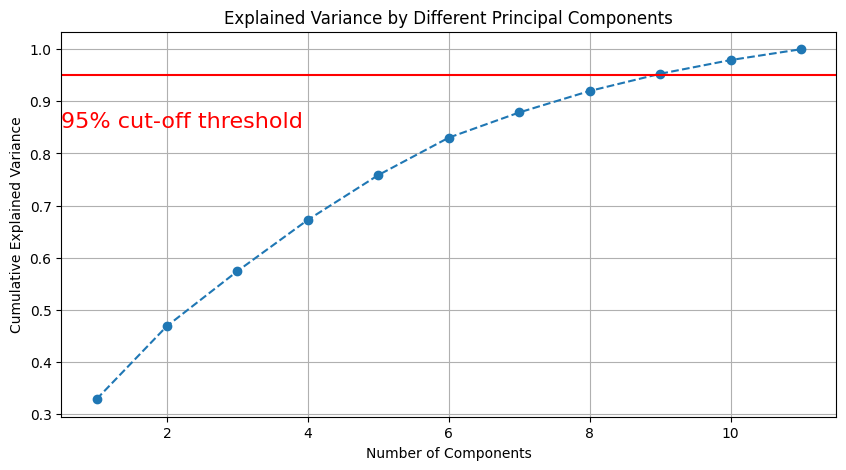

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame after preprocessing

# Perform PCA
scaler = StandardScaler()
pca = PCA()
standardized_data = scaler.fit_transform(df)
pca.fit(standardized_data)

# Number of components
n_pcs = pca.n_components_

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, n_pcs + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Cumulative explained variance (to help identify the elbow)
cumulative_explained_variance = np.cumsum(explained_variance)

# Line plot for the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_pcs + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-')  # Optional: Line to indicate the 95% threshold
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)  # Optional: Text for the 95% line
plt.grid(True)
plt.show()


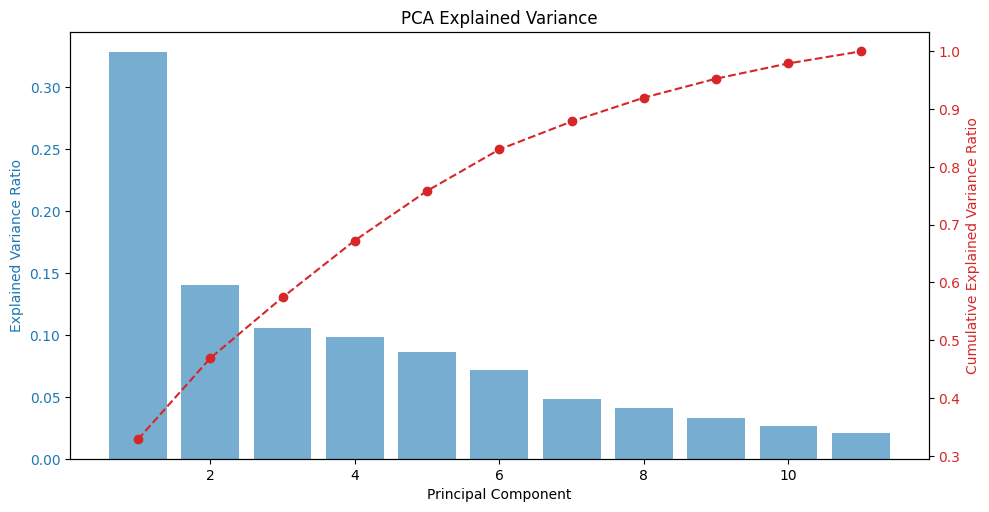

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Number of principal components
n_pcs = len(explained_variance)

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for explained variance by each PC
color = 'tab:blue'
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio', color=color)
ax1.bar(range(1, n_pcs + 1), explained_variance, alpha=0.6, color=color, label='Individual Explained Variance')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()  

# Line plot for cumulative explained variance
color = 'tab:red'
ax2.set_ylabel('Cumulative Explained Variance Ratio', color=color)  # We already handled the x-label with ax1
ax2.plot(range(1, n_pcs + 1), cumulative_explained_variance, color=color, marker='o', linestyle='--', label='Cumulative Explained Variance')
ax2.tick_params(axis='y', labelcolor=color)

# Optional: Add a legend or additional labels if needed
fig.tight_layout()  # To make sure that the layout is not overlapping
plt.title('PCA Explained Variance')
plt.show()

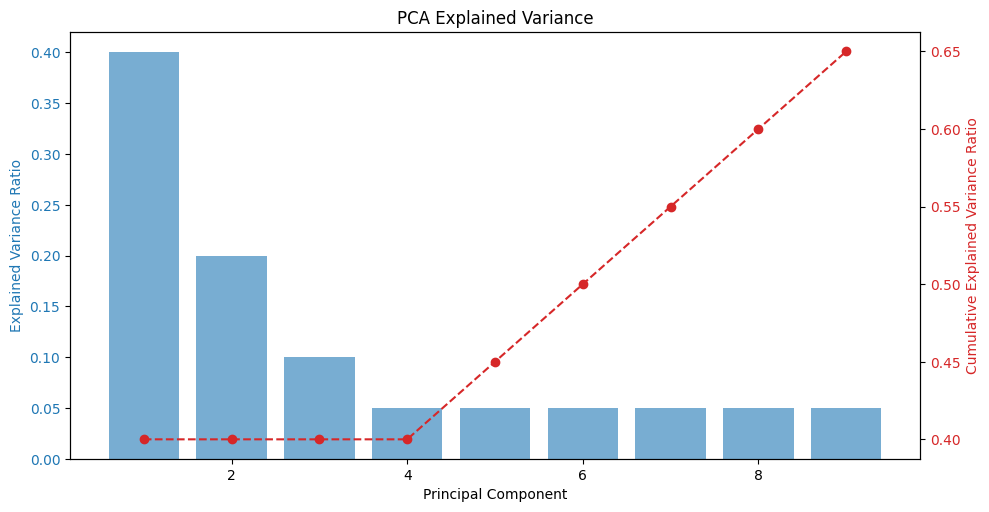

In [28]:
import matplotlib.pyplot as plt
import numpy as np

adjusted_cumulative_explained_variance = np.cumsum(explained_variance) - explained_variance[0] + explained_variance

# Number of principal components
n_pcs = len(explained_variance)

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for explained variance by each PC
color = 'tab:blue'
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio', color=color)
ax1.bar(range(1, n_pcs + 1), explained_variance, alpha=0.6, color=color, label='Individual Explained Variance')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()  

# Line plot for adjusted cumulative explained variance
color = 'tab:red'
ax2.set_ylabel('Cumulative Explained Variance Ratio', color=color)  # We already handled the x-label with ax1
ax2.plot(range(1, n_pcs + 1), adjusted_cumulative_explained_variance, color=color, marker='o', linestyle='--', label='Cumulative Explained Variance')
ax2.tick_params(axis='y', labelcolor=color)

# Optional: Add a legend or additional labels if needed
fig.tight_layout()  # To make sure that the layout is not overlapping
plt.title('PCA Explained Variance')
plt.show()


In [34]:
transformed_data.shape

(400, 11)